José Manuel Ramírez Araiza.. 03/10/2023

# TAREA

## Integración Montecarlo

1. Realizar las siguientes integrales. Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y cuyas columnas correspondan a las funciones.
    + $\int_{1}^{3} e^{x}\log(x)\text{d}x$.
    + $\int_1^3 \sin(x)\ln(x) \text{d}x$

#### Función 1

In [8]:
import numpy as np
def f(x):
    return np.exp(x)*np.log10(x)
a = 1
b = 3
N = 100000


In [9]:
import pandas as pd
N = np.logspace(1,5,5)
N

table = pd.DataFrame(columns=["Aproximación", "Error"], index=N)
table

,Aproximación,Error
10.0,NaN,NaN
100.0,NaN,NaN
1000.0,NaN,NaN
10000.0,NaN,NaN
100000.0,NaN,NaN


In [10]:
def montecarlo(f, N, a, b):
    u = np.random.uniform(a, b, N)
    media = np.mean(f(u))
    return media*(b-a)

In [11]:
for i in N:
    aproximacion = montecarlo(f, int(i), a, b)
    table.loc[i, "Aproximación"] = aproximacion
    table.loc[i, "Error"] = abs(6.09207 - aproximacion)

In [12]:
table

,Aproximación,Error
10.0,6.077845,0.014225
100.0,5.746783,0.345287
1000.0,5.944372,0.147698
10000.0,6.034749,0.057321
100000.0,6.062806,0.029264


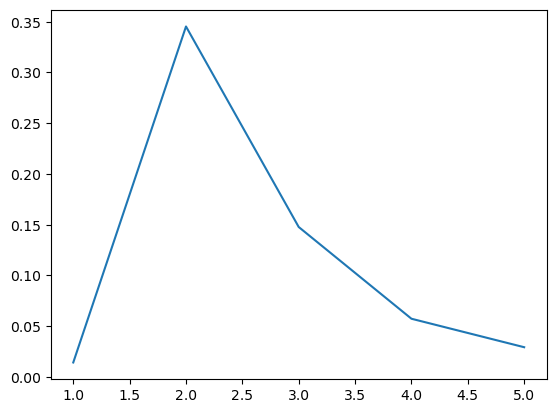

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.plot([1,2,3,4,5], table["Error"])

#### Función 2

In [18]:
import numpy as np
def f(x):
    return np.sin(x)*np.log(x)
a = 1
b = 3
N = 100000


In [19]:
import pandas as pd
N = np.logspace(1,5,5)
N

table = pd.DataFrame(columns=["Aproximación", "Error"], index=N)
table

,Aproximación,Error
10.0,NaN,NaN
100.0,NaN,NaN
1000.0,NaN,NaN
10000.0,NaN,NaN
100000.0,NaN,NaN


In [20]:
def montecarlo(f, N, a, b):
    u = np.random.uniform(a, b, N)
    media = np.mean(f(u))
    return media*(b-a)

In [21]:
for i in N:
    aproximacion = montecarlo(f, int(i), a, b)
    table.loc[i, "Aproximación"] = aproximacion
    table.loc[i, "Error"] = abs(0.869844 - aproximacion)

In [22]:
table

,Aproximación,Error
10.0,0.859323,0.010521
100.0,0.85641,0.013434
1000.0,0.882753,0.012909
10000.0,0.869836,0.000008
100000.0,0.870529,0.000685


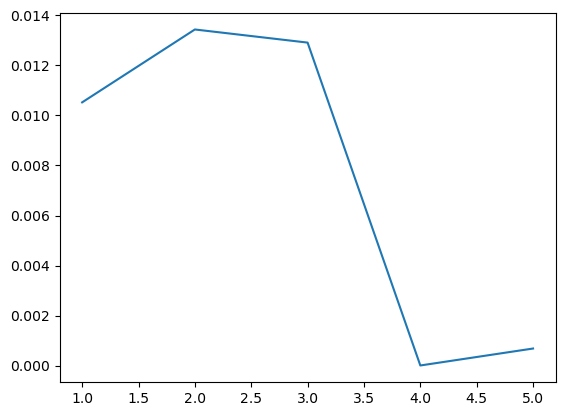

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.plot([1,2,3,4,5], table["Error"])

#### Dos funciones en una tabla:

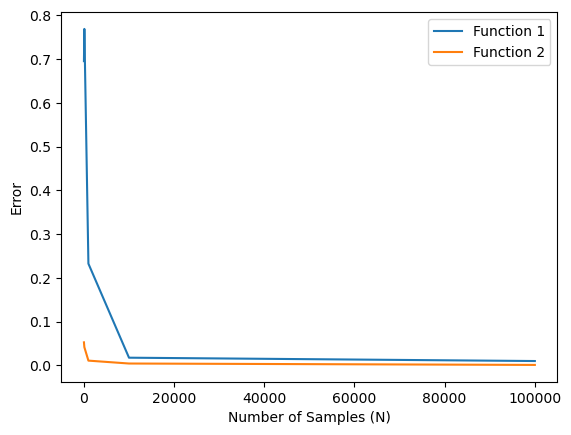

                    Función Aproximación     Error
Function 1 10.0          f1     5.396821  0.695249
           100.0         f1     5.323192  0.768878
           1000.0        f1     6.324536  0.232466
           10000.0       f1     6.109635  0.017565
           100000.0      f1     6.082126  0.009944
Function 2 10.0          f2     0.817169  0.052675
           100.0         f2     0.828212  0.041632
           1000.0        f2     0.880709  0.010865
           10000.0       f2      0.87411  0.004266
           100000.0      f2     0.868789  0.001055


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def montecarlo(f, N, a, b):
    u = np.random.uniform(a, b, N)
    media = np.mean(f(u))
    return media * (b - a)

def calculate_integral_error(f, N_values, a, b, exact_value):
    table = pd.DataFrame(columns=["Función", "Aproximación", "Error"], index=N_values)
    
    for i in N_values:
        aproximacion = montecarlo(f, int(i), a, b)
        error = abs(exact_value - aproximacion)
        table.loc[i, "Función"] = f.__name__
        table.loc[i, "Aproximación"] = aproximacion
        table.loc[i, "Error"] = error
    
    return table

a = 1
b = 3
N_values = np.logspace(1, 5, 5)

# Define the functions
def f1(x):
    return np.exp(x) * np.log10(x)

def f2(x):
    return np.sin(x) * np.log(x)

# Calculate integrals and errors for both functions
exact_value_f1 = 6.09207
exact_value_f2 = 0.869844

table_f1 = calculate_integral_error(f1, N_values, a, b, exact_value_f1)
table_f2 = calculate_integral_error(f2, N_values, a, b, exact_value_f2)

# Concatenate the two tables
result_table = pd.concat([table_f1, table_f2], keys=["Function 1", "Function 2"])

# Plot the errors
plt.figure()
for function_name, group in result_table.groupby(level=0):
    plt.plot(N_values, group["Error"], label=function_name)

plt.xlabel("Number of Samples (N)")
plt.ylabel("Error")
plt.legend()
plt.show()

# Display the combined result table
print(result_table)


2. Aproximar el área de la región descrita por

$$x^2+2y^2\leq-2x+8y-7$$

Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y en las columnas el valor de aproximación y el error relativo.

Definir unos límites adecuados $a_1$, $b_1$, $a_2$ y $b_2$, para la región $R=\left[a_1,b_1\right]\times\left[a_2,b_2\right]$

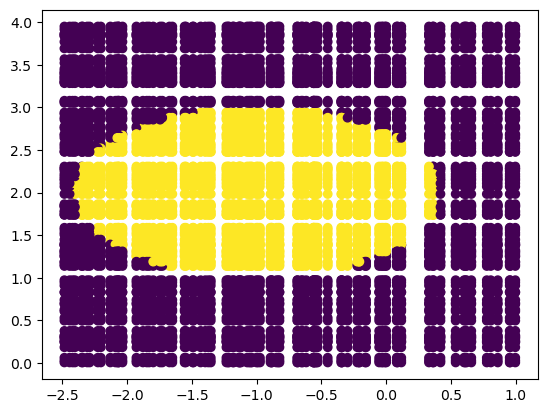

In [35]:
def f(x, y):
    return x**2 + 2*y**2 <= -2*x+8*y-7


def montecarlo2 (region, xa, xb, ya, yb, N) :
    x = np.random.uniform(xa, xb, N)
    y = np.random.uniform(ya, yb, N)
    B = region(x, y)
    AR = (xb - xa)*(yb - ya)
    
    return np.mean(B)*AR

x = np.random.uniform(-2.5, 1, 100)
y = np.random.uniform(0, 4, 100)

X, Y = np.meshgrid(x, y)

plt.figure()
plt.scatter(X, Y, c=f(X, Y))

In [38]:
montecarlo2(f, -2.5, 1, 0, 4, 100)

4.8999999999999995

In [39]:
N = np.logspace(1, 6, 6)
N

array([1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06])

In [40]:
import pandas as pd
tabla = pd.DataFrame(columns = ["Aproximacion"], index = N)

for i in N :
    aproximacion = montecarlo2(f, -2.5, 1, 0, 4, int(i))
    tabla.loc[i, "Aproximacion"] = aproximacion   
    
tabla

,Aproximacion
10.0,4.2
100.0,5.6
1000.0,4.648
10000.0,4.4562
100000.0,4.47104
1000000.0,4.441206


####  Error corregido en Montecarlo2 y referencias del último punto

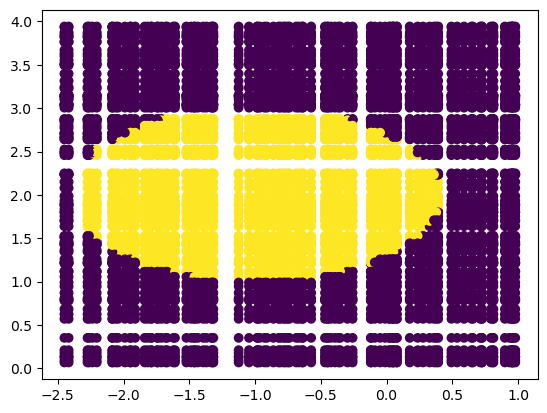

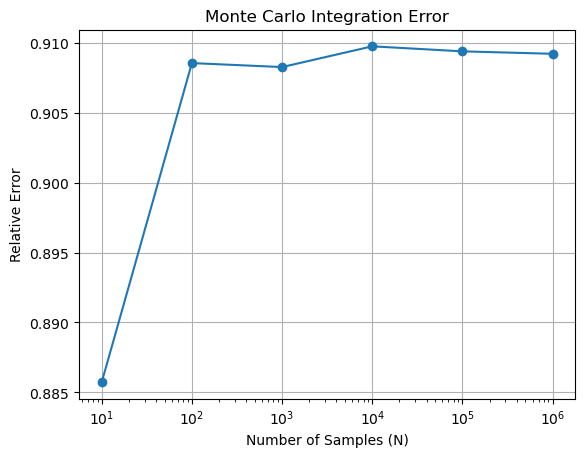

          Aproximacion Error Relativo
10.0               5.6       0.885714
100.0             4.48       0.908571
1000.0           4.494       0.908286
10000.0         4.4212       0.909771
100000.0       4.43884       0.909411
1000000.0     4.447394       0.909237


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def f(x, y):
    return x**2 + 2*y**2 <= -2*x + 8*y - 7

def montecarlo2(region, xa, xb, ya, yb, N):
    x = np.random.uniform(xa, xb, N)
    y = np.random.uniform(ya, yb, N)
    B = region(x, y)
    AR = (xb - xa) * (yb - ya)
    
    approximation = np.mean(B) * AR
    return approximation

x = np.random.uniform(-2.5, 1, 100)
y = np.random.uniform(0, 4, 100)
X, Y = np.meshgrid(x, y)

plt.figure()
plt.scatter(X, Y, c=f(X, Y))

N_values = np.logspace(1, 6, 6)
tabla = pd.DataFrame(columns=["Aproximacion", "Error Relativo"], index=N_values)

exact_integral = 49.0 

for N in N_values:
    approximation = montecarlo2(f, -2.5, 1, 0, 4, int(N))
    error_rel = abs(approximation - exact_integral) / exact_integral
    
    tabla.loc[N, "Aproximacion"] = approximation
    tabla.loc[N, "Error Relativo"] = error_rel


plt.figure()
plt.semilogx(N_values, tabla["Error Relativo"], marker='o')
plt.xlabel("Number of Samples (N)")
plt.ylabel("Relative Error")
plt.grid(True)
plt.title("Monte Carlo Integration Error")
plt.show()


print(tabla)


3. Describe 3 casos de uso de integración Montecarlo en tu ingeniería.

#### La integración Montecarlo en ingeniería civil:

#### Diseño de Estructuras Resistentes a Sismos:
La integración Montecarlo se utiliza para estimar la respuesta sísmica de estructuras civiles frente a eventos sísmicos. Se generan múltiples simulaciones de terremotos teniendo en cuenta diferentes combinaciones de parámetros sísmicos, como la intensidad del terremoto, la ubicación epicentral y la duración. Luego, se ejecutan análisis de respuesta estructural para cada simulación y se acumulan los resultados para evaluar la seguridad y el rendimiento de la estructura bajo incertidumbre sísmica.

#### Diseño de Sistemas de Abastecimiento de Agua y Alcantarillado:
En el diseño de sistemas de abastecimiento de agua y alcantarillado, es fundamental evaluar la capacidad y la eficiencia del sistema bajo diferentes escenarios de demanda y condiciones climáticas variables. La integración Montecarlo se utiliza para simular la variabilidad en la demanda de agua o en la intensidad de las precipitaciones a lo largo del tiempo. Esto permite dimensionar adecuadamente las infraestructuras y garantizar que funcionen de manera confiable bajo condiciones cambiantes.

#### Evaluación de Riesgos en Geotecnia:
En proyectos geotécnicos, como la construcción de presas o cimientos de edificios, la integración Montecarlo se aplica para evaluar los riesgos asociados a la variabilidad geológica y geotécnica. Se generan múltiples modelos geotécnicos considerando diferentes valores de parámetros como la resistencia del suelo, el coeficiente de fricción y la distribución de cargas. Luego, se realizan análisis de estabilidad y se cuantifican los riesgos de falla para tomar decisiones informadas sobre el diseño y la construcción.

REFERENCIAS:
1. Dowrick, D. J. (1996). Diseño de Estructuras Resistentes a Sismos, Para ingenieros y arquitectos. Ingeniería Sísmica. Recuperado de https://www.libreriaingeniero.com/2021/08/diseno-de-estructuras-resistentes-a-sismos-para-ingenieros-y-arquitectos.html
2. Comisión Nacional del Agua. (2019). Manual de Agua Potable, Alcantarillado y Saneamiento. Recuperado de https://agua.org.mx/biblioteca/manual-de-agua-potable-alcantarillado-y-saneamiento/
3. Sánchez, H. L. (2018). Identificación de peligros, evaluación de riesgos y estimación de controles de riesgos asociados a condiciones de seguridad en la población de mantenimiento de la división de recursos físicos de la Universidad Distrital Francisco José de Caldas. En Especialización en Higiene, Seguridad y Salud en el Trabajo (pp. 1-20). Universidad Distrital Francisco José de Caldas. Recuperado de https://repository.udistrital.edu.co/bitstream/handle/11349/14596/SanchezPrietoHectorLuis2018.pdf?sequence=1
